In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

The data for this problem is in the CSV file "firearms-urban.csv". The columns of interest for this investigation are:

* **RATE-2014**: The firearms mortality rate by state from 2014. 

* **Percent Urban**: The percentage of the total population in urban areas, from https://www.icip.iastate.edu/tables/population/urban-pct-states . Although this data is 2010, it should be sufficiently accurate for our purposes.

(a) Read in the file and convert it to a Pandas dataframe

In [2]:
df=pd.read_csv("firearms-urban.csv")

In [3]:
df

,STATE,RATE-2014,Percent Urban
0,AL,16.9,59.0
1,AK,19.2,66.0
2,AZ,13.5,89.8
3,AR,16.6,56.2
4,CA,7.4,95.0
5,CO,12.2,86.2
6,CT,5.0,88.0
7,DE,11.1,83.3
8,FL,11.5,91.2
9,GA,13.7,75.1


(b) Create a scatter plot of the firearms mortality rate (y-axis) vs the percentage of the population living in urban areas (x-axis). Label the axes. Plot the point for Florida using a different color and/or marker style.

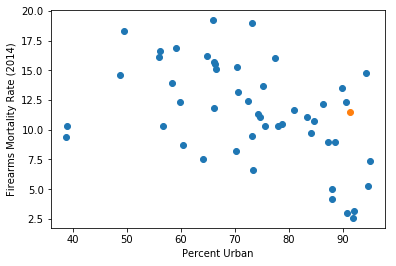

In [4]:
# MAKE TWO DATA FRAMES, ONE FOR FL AND ONE FOR NOT FL
not_fl = df.loc[df["STATE"] != "FL"]
fl = df.loc[df["STATE"] == "FL"]

# CALCULATE NOT FL RATES
mort_rate_not_fl = np.array(not_fl["RATE-2014"])
urban_percent_not_fl = np.array(not_fl["Percent Urban"])

# CALCULAT FL RATES
mort_rate_fl = np.array(fl["RATE-2014"])
urban_percent_fl = np.array(fl["Percent Urban"])

# PLOT NOT FL
plt.scatter(x=urban_percent_not_fl,y=mort_rate_not_fl);

# PLOT FL
plt.scatter(x=urban_percent_fl,y=mort_rate_fl);

# LABEL AXES
plt.xlabel("Percent Urban");
plt.ylabel("Firearms Mortality Rate (2014)");

(c) We will partition the states as follows: Urban states have $>80$% of the population living in urban areas. Rural states have $\le 80$% of the population living in urban areas. On the same graph, plot histograms for the firearms mortality rates of urban and rural states. Use the same bin indices for both histograms. Use transparency to make the histograms more readable. Add a legend and axes labels.

In [5]:
urban = df.loc[df["Percent Urban"] > 80];
rural = df.loc[df["Percent Urban"] <= 80];

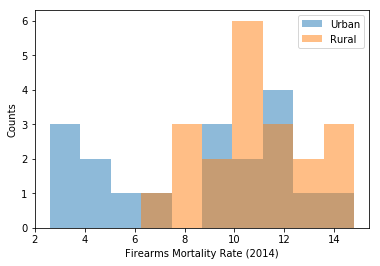

In [6]:
n,bins,patches = plt.hist(urban["RATE-2014"],alpha=0.5,label
="Urban");
plt.hist(rural["RATE-2014"],alpha=0.5,bins=bins,label
="Rural");
plt.legend();
plt.xlabel("Firearms Mortality Rate (2014)");
plt.ylabel("Counts");

(d) Find the mean firearms mortality rates for both urban and rural states. Compute the difference in means.

In [7]:
urban_rate = urban["RATE-2014"].mean()
rural_rate = rural["RATE-2014"].mean()
diff = abs(urban_rate-rural_rate)
urban_rate,rural_rate,diff

(8.677777777777777, 12.99375, 4.315972222222223)

(e) Find the median firearms mortality rates for both urban and rural states.

In [8]:
urban_median = urban["RATE-2014"].median()
rural_median = rural["RATE-2014"].median()
urban_median,rural_median

(9.35, 12.8)

(f) In a sentence or two, comment on the results of parts d) and e).

Both the median and the mean firearm mortality rates are higher for rural states, by several percentage points.

(g) Construct a two-sided binary hypothesis test using random sampling (bootstrap or Monte Carlo permutation) and determine the probability of such a large difference in means under the null hypothesis. Use at least 10,000 samples.

In [9]:
len(urban),len(rural)

(18, 32)

In [10]:
pooled = np.array(df['RATE-2014'])

num_sims=1000000
event_count=0
bs_stats = []
for sim in range(num_sims):
    
    perm=npr.permutation(pooled)
    sample_urban=perm[:len(urban)]
    sample_rural=perm[len(urban):]
    
#     sample_urban = npr.choice(pooled, size=18)
#     sample_rural = npr.choice(pooled, size=32)
    # Bootstrap samples DO NOT have to be the same size # They should be the sizes of the original sample
    mean_urban = sample_urban.mean()
    mean_rural = sample_rural.mean()
    sample_diff = mean_rural-mean_urban
    abs_sample_diff = abs(sample_diff)
    bs_stats += [abs_sample_diff]
    if abs_sample_diff >= diff:
            event_count+=1        
            
prob = event_count/num_sims
print("Under the null hypothesis, observe effect this large with prob =~",prob,".", sep="")
print("This is statistically significant at the p <= 0.05 level.")

Under the null hypothesis, observe effect this large with prob =~0.000191.
This is statistically significant at the p <= 0.05 level.


(h) Plot a histogram of the observed mean differences from at least 10,000 random samples under the null hypothesis.

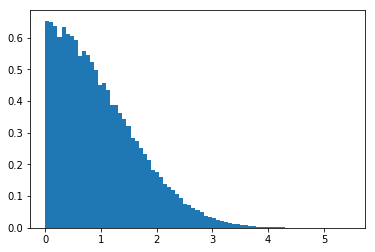

In [11]:
plt.hist(bs_stats,density=True,bins=75);

(i) Use random sampling to determine a 95% confidence interval for the mean difference under the null hypothesis.

In [12]:
def confidence_interval(bs_stats, n):
    bs_stats.sort()
    x = (1-n/100)
    lower=int(len(bs_stats)*x/2)
    upper=int(len(bs_stats)-lower-1)
    bs_stats[lower],bs_stats[upper]
    print('The ',n,'% confidence interval is [',bs_stats[lower],', ',bs_stats[upper],'].',sep="")
    return bs_stats[lower],bs_stats[upper]

In [13]:
confidence_interval(bs_stats,95)

The 95% confidence interval is [0.0364583333333357, 2.715277777777775].


(0.0364583333333357, 2.715277777777775)

(j) Discuss the results of part (g)-(i).  Is there sufficient statistical data to claim that urban states and rural states have differen firearms mortalities?

I believe that there is indeed sufficient statistical data to claim that urban states and rurla states have different firearms mortalities. We saw that the diff is as large as 4.315 only with probability ~0.00019. We also saw that our confidence interval ranged from 0.0365 to 2.715. 4.315, our observed diff, was very far removed from this confidence interval